<a href="https://colab.research.google.com/github/iam-smjamilsagar/Deep-Learning-basics-with-Python-TensorFlow-and-Keras/blob/main/TensorFlow%2C_and_Keras_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow.keras as keras
import tensorflow as tf # deep learning library. Tensors are just multi-dimensional arrays
mnist = tf.keras.datasets.mnist # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data() 
# Here x_train data is the "features." In this case, the features are pixel values of the 28x28 images of these digits 0-9. and y_train is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9?). 
# unpacks images to x_train/x_test and labels to y_train/y_test

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

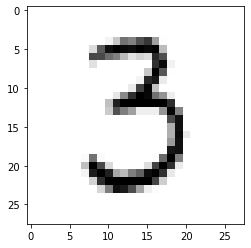

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50],cmap=plt.cm.binary)
plt.show()

x_train = tf.keras.utils.normalize(x_train, axis=1) 
x_test = tf.keras.utils.normalize(x_test, axis=1)  # axis=1 stands for columns

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

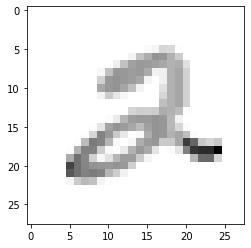

In [6]:
print(x_train[1])

plt.imshow(x_train[5],cmap=plt.cm.binary)
plt.show()

In [7]:
model = tf.keras.models.Sequential() # a basic feed-forward model
model.add(tf.keras.layers.Flatten()) # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # a simple fully-connected layer, 128 units, relu activation. relu, short for rectified linear. hidden layers.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # a simple fully-connected layer, 128 units, relu activation. hidden layers.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # our output layer. 10 units for 10 classes. Softmax for probability distribution
model.compile(optimizer='adam', # Good default optimizer to start with
              loss='sparse_categorical_crossentropy', # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track 
model.fit(x_train, y_train, epochs=4) # train the model

Epoch 1/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4717 - accuracy: 0.8662
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9665
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0692 - accuracy: 0.9786
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9838


In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test) # evaluate the out of sample data with model
print(val_loss) # model's loss (error)
print(val_acc) # model's accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.0831 - accuracy: 0.9747
0.08306686580181122
0.9746999740600586


In [9]:
model.save('num_reader.model') # saving the model to the directory

INFO:tensorflow:Assets written to: num_reader.model/assets


In [10]:
new_model = tf.keras.models.load_model('num_reader.model') # loading the model from the directory

In [11]:
predictions = new_model.predict(x_test) # making predictions
print(predictions) # printing the predictions

[[3.1996064e-10 7.9954205e-08 2.4383703e-06 ... 9.9999642e-01
  6.0788080e-10 1.7169210e-09]
 [6.7942707e-11 5.0296653e-06 9.9998760e-01 ... 9.5164598e-10
  2.7898887e-08 1.1420747e-14]
 [1.9062516e-07 9.9960405e-01 5.8112644e-05 ... 1.3700793e-04
  8.8062348e-05 3.3289558e-07]
 ...
 [1.2956064e-10 6.4639195e-08 1.7465454e-09 ... 3.0512613e-06
  2.6553689e-08 7.9836345e-06]
 [5.7129398e-08 5.4698539e-08 6.8239920e-09 ... 1.4147653e-06
  1.1184669e-02 6.2652461e-10]
 [8.6455763e-08 3.7161897e-08 5.7175254e-07 ... 9.3331530e-11
  3.9226688e-08 2.1815131e-11]]


In [15]:
import numpy as np

print(np.argmax(predictions[5])) # printing the predictions with numpy to understand clearly

1


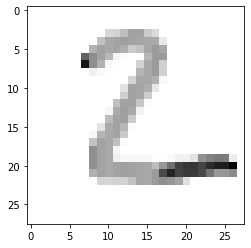

In [16]:
plt.imshow(x_test[1],cmap=plt.cm.binary) # calling the data and checking whether the prediction is right or wrong
plt.show()